In [1]:
# imports
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
# Load the tips dataset
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
# split data into train, validation, and test sets
import wrangle
train, valid, test = wrangle.split_dataframe(df)
# create a X and y for the training set

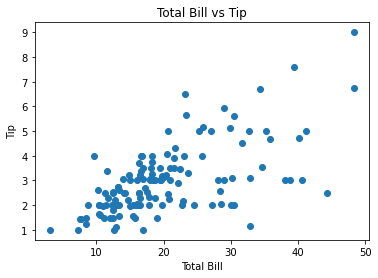

In [4]:
# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
plt.scatter(train['total_bill'], train['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
# create a new dataframe with only the columns we want to use for regression
df_reg = df[['total_bill', 'tip']]
df_reg.head()

,total_bill,tip
236,12.60,1.00
232,11.61,3.39
160,21.50,3.50
123,15.95,2.00
225,16.27,2.50


In [6]:
# create a baseline mean prediction 
baseline = df_reg['tip'].mean()
df_reg['yhat_baseline'] = baseline
df_reg.head(3)
# create a baseline median prediction
# baseline_median = df_reg['tip'].median()
# df_reg['yhat_baseline'] = baseline_median

,total_bill,tip,yhat_baseline
236,12.60,1.00,2.967206
232,11.61,3.39,2.967206
160,21.50,3.50,2.967206


In [7]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(df_reg[['total_bill']], df_reg.tip)

# compute predictions and add to original dataframe
df_reg['yhat'] = ols_model.predict(df_reg[['total_bill']])

df_reg.head(3)


,total_bill,tip,yhat_baseline,yhat
236,12.60,1.00,2.967206,2.233042
232,11.61,3.39,2.967206,2.134854
160,21.50,3.50,2.967206,3.115751


3. Plot the residuals for the linear regression model that you made.

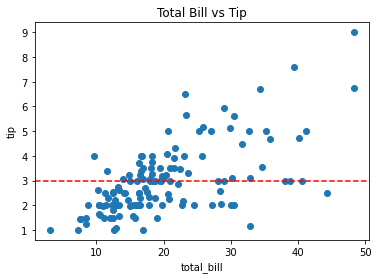

In [8]:
# Plot the residuals for the linear regression model that you made.
plt.scatter(df_reg['total_bill'], df_reg['tip'])
plt.axhline(y = baseline, color = 'red', linestyle = '--')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('Total Bill vs Tip')
plt.show()

In [9]:
# compute the residuals
df_reg['residuals'] = df_reg['yhat'] - df_reg['tip']
df_reg['residual_baseline'] = df_reg['yhat_baseline'] - df_reg['tip']
df_reg.head(3)

,total_bill,tip,yhat_baseline,yhat,residuals,residual_baseline
236,12.60,1.00,2.967206,2.233042,1.233042,1.967206
232,11.61,3.39,2.967206,2.134854,-1.255146,-0.422794
160,21.50,3.50,2.967206,3.115751,-0.384249,-0.532794


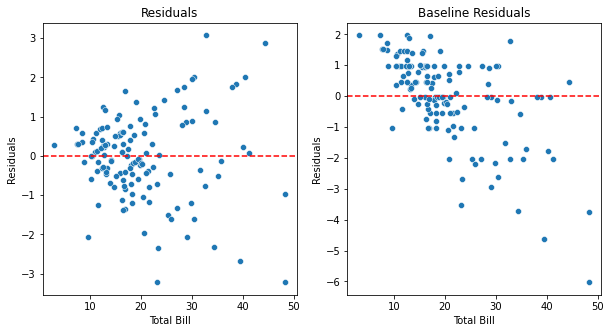

In [10]:
# create a scatter subplots of the residuals and the baseline residuals
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(x = 'total_bill', y = 'residuals', data = df_reg, ax = ax[0])
ax[0].axhline(y = 0, color = 'red', linestyle = '--')
ax[0].set_title('Residuals')
ax[0].set_xlabel('Total Bill')
ax[0].set_ylabel('Residuals')

sns.scatterplot(x = 'total_bill', y = 'residual_baseline', data = df_reg, ax = ax[1])
ax[1].axhline(y = 0, color = 'red', linestyle = '--')
ax[1].set_title('Baseline Residuals')
ax[1].set_xlabel('Total Bill')
ax[1].set_ylabel('Residuals')
plt.show()


In [11]:
# square the residuals and the baseline residuals
df_reg['residuals_sq'] = df_reg['residuals'] ** 2
df_reg['residual_baseline_sq'] = df_reg['residual_baseline'] ** 2
df_reg.head(3)

,total_bill,tip,yhat_baseline,yhat,residuals,residual_baseline,residuals_sq,residual_baseline_sq
236,12.60,1.00,2.967206,2.233042,1.233042,1.967206,1.520394,3.869899
232,11.61,3.39,2.967206,2.134854,-1.255146,-0.422794,1.575393,0.178755
160,21.50,3.50,2.967206,3.115751,-0.384249,-0.532794,0.147647,0.283870



4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
# Calculate the sum of squared errors
sse = df_reg['residuals_sq'].sum()
# explained sum of squares
ess = sum((df_reg.yhat - df_reg['tip'].mean())**2)
# total sum of squares
tss = ess + sse
# mean squared error
mse = sse / len(df_reg)
# roor mean squared error
rmse = sqrt(mse)

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model

In [13]:
# Calculate the sum of squared errors for the baseline prediction
sse_baseline = sum(df_reg['residual_baseline_sq'])
# mean squared error for baseline
mse_baseline = sse_baseline/len(df_reg)
# root mean squared error for the baseline model
rmse_baseline = sqrt(mse_baseline)

In [14]:
# print the results and compare to the baseline
print('SSE:', sse)
print('SSE baseline:', sse_baseline)
print('----------------------------')
print('MSE:', mse)
print('MSE baseline:', mse_baseline)
print('----------------------------')
print('RMSE:', rmse)
print('RMSE baseline:', rmse_baseline)


SSE: 154.5209963922744
SSE baseline: 261.6585382352941
----------------------------
MSE: 1.1361837970020177
MSE baseline: 1.9239598399653977
----------------------------
RMSE: 1.0659192263028272
RMSE baseline: 1.3870687942439617


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [15]:
# create a functions that checks sse, mse, and rmse against the baseline
def sse_check(sse, sse_baseline):
    if sse < sse_baseline:
        print('The model appears to be better than the baseline')
    else:
        print('The model does not appear to be better than the baseline')
    return 

def mse_check(mse, mse_baseline):
    if mse < mse_baseline:
        print('The model is performing better than the baseline')
    else:
        print('The model is not performing better than the baseline')
    return

def rmse_check(rmse, rmse_baseline):

    if rmse < rmse_baseline:
        print('The model is better than having no model at all')
    else:
        print('Your better off by having no model at all')
    return

sse_check(sse, sse_baseline)

The model appears to be better than the baseline


7. What is the amount of variance explained in your model?

In [16]:
# utilize r2_score to calculate the r-squared value
r2 = r2_score(df_reg['tip'], df_reg['yhat'])
print('Percentage of variance explained:', round(r2*100,1),"%")

Percentage of variance explained: 40.9 %


In [17]:
# utilize explained_variance_score to calculate the explained variance
evs = explained_variance_score(df_reg['tip'], df_reg['yhat'])
print('Explained variance:', round(evs,3))

Explained variance: 0.409


8. Is your model better than the baseline model?

In [18]:
# check if the model better than the baseline model
def model_check():
    if sse < sse_baseline and mse < mse_baseline and rmse < rmse_baseline:
        print('The model you created is better than the baseline model.')
    else:
        print('The model you created is not better than the baseline model.')
    return

model_check()

The model you created is better than the baseline model.


9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [19]:
# create a function that computes residuals
def residuals(df, y, X):
    ''' Plug in the dataframe, target(column), and X(column) to compute the residuals. '''
    baseline = y.mean()
    df['yhat_baseline'] = baseline

    ols_model = LinearRegression().fit(X, y)
    df['yhat'] = ols_model.predict(X)
    
    df['residuals'] = df['yhat'] - y
    df['residual_baseline'] = df['yhat_baseline'] - y
    return df
residuals(df, df['tip'], df[['total_bill']])

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residuals,residual_baseline
236,12.60,1.00,Male,Yes,Sat,Dinner,2,2.967206,2.233042,1.233042,1.967206
232,11.61,3.39,Male,No,Sat,Dinner,2,2.967206,2.134854,-1.255146,-0.422794
160,21.50,3.50,Male,No,Sun,Dinner,4,2.967206,3.115751,-0.384249,-0.532794
123,15.95,2.00,Male,No,Thur,Lunch,2,2.967206,2.565298,0.565298,0.967206
225,16.27,2.50,Female,Yes,Fri,Lunch,2,2.967206,2.597036,0.097036,0.467206
...,...,...,...,...,...,...,...,...,...,...,...
224,13.42,1.58,Male,Yes,Fri,Lunch,2,2.967206,2.314371,0.734371,1.387206
130,19.08,1.50,Male,No,Thur,Lunch,2,2.967206,2.875734,1.375734,1.467206
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.967206,3.297252,-2.352748,-2.682794
136,10.33,2.00,Female,No,Thur,Lunch,2,2.967206,2.007902,0.007902,0.967206


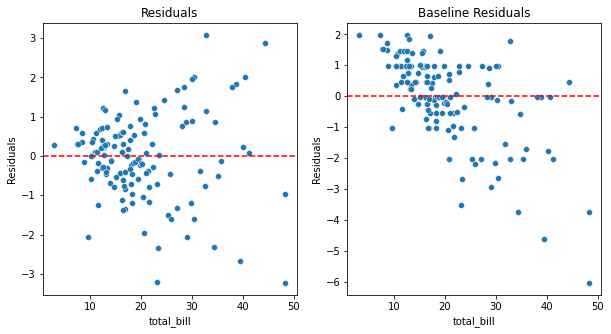

In [20]:
# create a function called plot_residuals(y, yhat) that creates a residual plot
def plot_residuals(df, y, yhat, x):

    # create a residual column if it doesn't already exist
    if 'residuals' not in df.columns:
        df['residuals'] = y - yhat
    else:
        pass
    # create a residuals_baseline column if it doesn't already exist
    if 'residual_baseline' not in df.columns:
        df['residual_baseline'] = y - df['yhat_baseline']
    else:
        pass
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    sns.scatterplot(x, y = 'residuals', data = df_reg, ax = ax[0])
    ax[0].axhline(y = 0, color = 'red', linestyle = '--')
    ax[0].set_title('Residuals')
    ax[0].set_xlabel(x)
    ax[0].set_ylabel('Residuals')
    
    sns.scatterplot(x, y = 'residual_baseline', data = df_reg, ax = ax[1])
    ax[1].axhline(y = 0, color = 'red', linestyle = '--')
    ax[1].set_title('Baseline Residuals')
    ax[1].set_xlabel(x)
    ax[1].set_ylabel('Residuals')
    return plt.show()
plot_residuals(df_reg, df_reg['tip'], df_reg['yhat'], 'total_bill')

In [21]:
# create a function called regression_errors(y, yhat) that returns the following values: sse, ess, tss, mse, rmse
def regression_errors(df, y, yhat):
    sse = sum((y - yhat) ** 2)
    ess = sum((yhat - df['yhat_baseline']) ** 2)
    tss = ess + sse
    mse = sse / len(df)
    rmse = sqrt(mse)
    # compute explained variance
    r2 = ess/tss
    print('SSE:', round(sse,3))
    print('ESS:', round(ess,3))
    print('TSS:', round(tss,3))
    print('MSE:', round(mse,3))
    print('RMSE:', round(rmse,3))
    print('Explained Variance:', round(r2*100,2),'%')
    return 
regression_errors(df, df_reg['tip'], df_reg['yhat'])

SSE: 154.521
ESS: 107.138
TSS: 261.659
MSE: 1.136
RMSE: 1.066
Explained Variance: 40.95 %


In [22]:
# create a function named baseline_mean_errors(y) that computes the SSE, MSE, and RMSE for the baseline model
def baseline_mean_errors(df, y):
    # create a residual baseline sq column if it doesn't already exist
    if 'residual_baseline_sq' not in df.columns:
        df['residual_baseline_sq'] = (y - df['yhat_baseline']) ** 2
    else:
        pass
    sse_baseline = sum(df['residual_baseline_sq'])
    mse_baseline = sse_baseline/len(df)
    rmse_baseline = sqrt(mse_baseline)
    
    print('SSE baseline:', round(sse_baseline,3))
    print('MSE baseline:', round(mse_baseline,3))
    print('RMSE baseline:', round(rmse_baseline,3))
    return
baseline_mean_errors(df_reg, df_reg['tip'])

SSE baseline: 261.659
MSE baseline: 1.924
RMSE baseline: 1.387


In [23]:
# create a function named better_than_baseline(y, yhat) that returns true if your model performs better than the baseline, otherwise false
def better_than_baseline(df, y, yhat):
    if sse < sse_baseline and mse < mse_baseline and rmse < rmse_baseline:
        print('The model you created is better than the baseline model.')
    else:
        print('The model you created is not better than the baseline model.')
    return
better_than_baseline(df_reg, df_reg['tip'], df_reg['yhat'])

The model you created is better than the baseline model.


10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [37]:
# load in mpg data
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [38]:
import evaluate

evaluate.residuals(mpg, mpg['mpg'], mpg[['weight']])


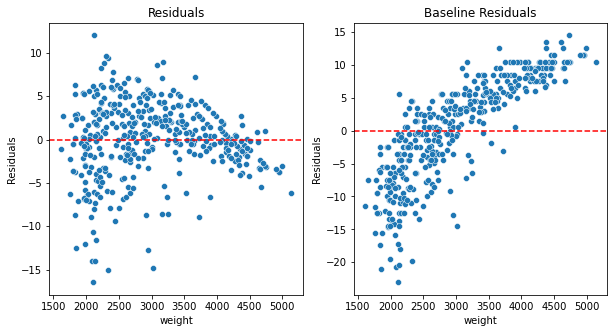

In [39]:
evaluate.plot_residuals(mpg, mpg['mpg'], mpg['yhat'], 'weight')

In [40]:
evaluate.regression_errors(mpg, mpg['mpg'], mpg['yhat'])

SSE: 7474.814
ESS: 16777.761
TSS: 24252.575
MSE: 18.781
RMSE: 4.334
Explained Variance: 69.18 %


In [41]:
evaluate.baseline_mean_errors(mpg, mpg['mpg'])

SSE baseline: 24252.575
MSE baseline: 60.936
RMSE baseline: 7.806


In [42]:
evaluate.better_than_baseline(mpg, mpg['mpg'], mpg['yhat'])

The model you created is better than the baseline model.
